In [83]:
"""
Datta, "Quantum Transport: Atom to Transistor" Fig. 2.3.2

Yong-Hoon Kim, School of Electrical Engineering, Korea Advanced Institute of Science & Technology (KAIST)
2021/09/16 I now use the [0:N] grid rather than Datta's [0:N+1] 
2020/12/26 Written
"""
import numpy as np
from numpy import linalg as LA 
import matplotlib.pyplot as plt

# Atomic units
AU2Ang = 0.529177210903 #0.5291772083
# https://physics.nist.gov/cgi-bin/cuu/Value?bohrrada0
AU2eV = 27.211386245988 #27.21138344
# https://physics.nist.gov/cgi-bin/cuu/Value?hrev

# Effective mass atomic units
meff = 1.   # effective mass [free electron mass] e.g. GaAs: electron = 0.066; heavy hole = 0.5; light hole = 0.082 
eps = 1.   # permittivity [vacuum permittivity] e.g. GaAs: 11.9
EU2Ang = AU2Ang * eps / meff
EU2eV = AU2eV * meff / eps**2
print('Effective length unit = %.5f [Ang]' % (EU2Ang))
print('Effective energy unit = %.5f [eV]' % (EU2eV))
Ang2EU = 1/EU2Ang
eV2EU = 1/EU2eV

Effective length unit = 0.52918 [Ang]
Effective energy unit = 27.21139 [eV]


In [84]:
# Input (in EU)
xmin = 0.; xmax = 100.*Ang2EU  # X range [Ang]
nx = 100 # Num. of grid points - 1 (Python convention)

# X lattice
L = xmax - xmin
dx = L/nx 
print('L = %.1f [Ang]' % (L*EU2Ang))
print('dx= %.1f [Ang]' % (dx*EU2Ang))
X = dx * np.linspace(0,nx,nx+1) # Grid stencil **including** box boundary points
#X = dx * np.arange(0,nx+1) # Equivalent to the above
#print(X*EU2ANG)
X = X[1:-1] # Perform calculations only for the box inside region. Otherwise, specify the potential values at boundary points (see below).
nx = X.size
print(X*EU2Ang)
print(X.size)

L = 100.0 [Ang]
dx= 1.0 [Ang]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72.
 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89. 90.
 91. 92. 93. 94. 95. 96. 97. 98. 99.]
99


In [85]:
# Hamiltonian
t0 = 1/(2*dx**2)
T = 2*t0*np.eye(nx) - t0*np.eye(nx,k=+1) - t0*np.eye(nx,k=-1) 
#T[0,0] += 1000.; T[-1,-1] += 1000. #For the explicit inclusion of boundary points (infinity BC)
print(T)

# Diagonalization
E,V   = LA.eigh(T)
#print(E*EU2eV)

[[ 0.28002852 -0.14001426  0.         ...  0.          0.
   0.        ]
 [-0.14001426  0.28002852 -0.14001426 ...  0.          0.
   0.        ]
 [ 0.         -0.14001426  0.28002852 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.28002852 -0.14001426
   0.        ]
 [ 0.          0.          0.         ... -0.14001426  0.28002852
  -0.14001426]
 [ 0.          0.          0.         ...  0.         -0.14001426
   0.28002852]]


In [86]:
# Analysis (Visualization)
ieig1 = 1 # index for the 1st eigenvalue/eigenstate to be analyzed
ieig2 = 10 # index for the 2nd eigenvalue/eigenstate to be analyzed 
E1 = E[ieig1-1]; psi1 = V[:,ieig1-1]; P1 = psi1*np.conj(psi1)
E2 = E[ieig2-1]; psi2 = V[:,ieig2-1]; P2 = psi2*np.conj(psi2)
print('Numerical eigenvalue %3i = %.5f [eV]' % (ieig1, E[ieig1-1]*EU2eV))
print('Numerical eigenvalue %3i = %.5f [eV]' % (ieig2, E[ieig2-1]*EU2eV))
print(sum(P1)); print(sum(P1)) # Check normalization

# Analytical eigenvalues 
Ean = 1/2 * (np.pi/L)**2 * np.arange(1,nx+1)**2
#print(np.linspace(1,nx,nx))
#print(np.arange(1,nx+1))
#print(Ean*EU2eV)
print('Analytic eigenvalue %3i = %.5f [eV]' % (ieig1, Ean[ieig1-1]*EU2eV))
print('Analytic eigenvalue %3i = %.5f [eV]' % (ieig2, Ean[ieig2-1]*EU2eV))

# Analytical eigenstates
nXan = 1000 # Number of grid points for displaying eigenstates
dXan = L/nXan 
Xan = dXan*np.linspace(0,nXan,nXan+1) # Grid stencil **including** box boundary points
#Xan = dXan*np.arange(0,nXan+1)   # Equivalent to the above
print(Xan*EU2Ang)
psian1 = np.sqrt(2/L) * np.sin(ieig1*np.pi/L*Xan); Pan1 = psian1*np.conj(psian1)
psian2 = np.sqrt(2/L) * np.sin(ieig2*np.pi/L*Xan); Pan2 = psian2*np.conj(psian2)
print(sum(Pan1)*dXan); print(sum(Pan2)*dXan) # Check normalization

Numerical eigenvalue   1 = 0.00376 [eV]
Numerical eigenvalue  10 = 0.37295 [eV]
1.0000000000000004
1.0000000000000004
Analytic eigenvalue   1 = 0.00376 [eV]
Analytic eigenvalue  10 = 0.37603 [eV]
[0.00e+00 1.00e-01 2.00e-01 ... 9.98e+01 9.99e+01 1.00e+02]
1.0000000000000004
0.9999999999999982


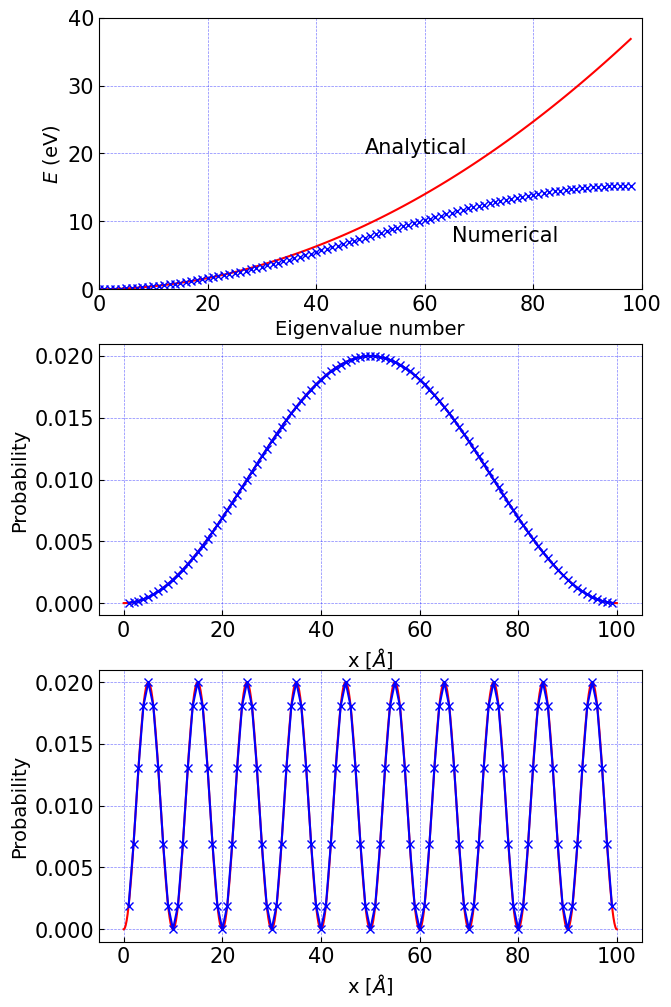

In [87]:
# Numerical vs. Analytical: Check both eigenvalues & eigenstates
#fig = plt.figure(figsize=[14,4])
#ax1 = fig.add_subplot(1,2,1)
#ax2 = fig.add_subplot(1,2,2)
fig = plt.figure(figsize=[7,12])
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

# Numerical vs. Analytical: Eigenvalues
ax1.plot(Ean*EU2eV,'r')
ax1.plot(E*EU2eV,'bx')
ax1.set_xlabel('Eigenvalue number',fontsize = 14)
ax1.set_ylabel('$E$ (eV)',fontsize = 14)
ax1.set_xlim(0,100)
ax1.set_ylim(0,40)
ax1.tick_params(axis='both',which='major',labelsize=15,direction='in')
ax1.text(49,20,'Analytical',fontsize=15)
ax1.text(65,7,'Numerical',fontsize=15)
ax1.grid(color='b', alpha=0.5, ls='--',lw=0.5)

# Numerical vs. Analytical: Eigenstate 1
ax2.plot(Xan*EU2Ang,Pan1*dx,'r') #"dx" is necessary to compare with numerical results. See Eq. (2.3.2).
ax2.plot(X*EU2Ang,P1,'bx-')
#ax2.plot(Xan*EU2Ang,psian1,'r')
#ax2.plot(X*EU2ANG,psi1,'bx-')
ax2.set_xlabel('x [$\AA$]',fontsize = 14)
ax2.set_ylabel('Probability',fontsize = 14)
#plt.xlim(0,100)
#plt.ylim(0,40)
ax2.tick_params(axis='both',which='major',labelsize=15,direction='in')
ax2.grid(color='b', alpha=0.5, ls='--',lw=0.5)

# Numerical vs. Analytical: Eigenstate 2
ax3.plot(Xan*EU2Ang,Pan2*dx,'r') #"dx" is necessary to compare with numerical results. See Eq. (2.3.2).
ax3.plot(X*EU2Ang,P2,'bx-')
#ax3.plot(Xan*EU2ANG,psian2,'r')
#ax3.plot(X*EU2ANG,psi2,'bx-')
ax3.set_xlabel('x [$\AA$]',fontsize = 14)
ax3.set_ylabel('Probability',fontsize = 14)
#plt.xlim(0,100)
#plt.ylim(0,40)
ax3.tick_params(axis='both',which='major',labelsize=15,direction='in')
ax3.grid(color='b', alpha=0.5, ls='--',lw=0.5)